In [72]:
from google.colab import files
uploaded = files.upload()

Saving wipro_daywise.csv to wipro_daywise (2).csv


In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
# load the dataset
dataframe = pandas.read_csv('wipro_daywise.csv', usecols=[11], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [157]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2441 1203


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [162]:
# create and fit the LSTM network
model = Sequential()

model.add(LSTM(128, input_shape=(1, look_back)))

model.add(Dense(16))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=20, batch_size=5, verbose=1)

Epoch 1/20
2439/2439 [==============================] - 9s 4ms/step - loss: 3.7267e-04
Epoch 2/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.5561e-04
Epoch 3/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.5750e-04
Epoch 4/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.5387e-04
Epoch 5/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.4831e-04
Epoch 6/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.5097e-04
Epoch 7/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.5364e-04
Epoch 8/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.4658e-04
Epoch 9/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.4856e-04
Epoch 10/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.4041e-04
Epoch 11/20
2439/2439 [==============================] - 5s 2ms/step - loss: 3.5006e-04
Epoch 12/20
2439/2439 [==================

Test Score: 20.74 RMSE


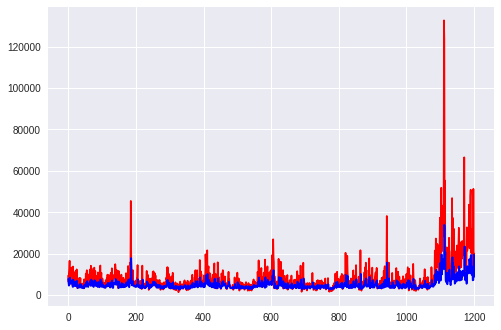

In [163]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
plt.plot(scaler.inverse_transform(numpy.array(testY).reshape(-1,1)),'r')
plt.plot(scaler.inverse_transform(numpy.array(testPredict).reshape(-1,1)),'b')